In [ ]:
# Standard modules
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

# Graphical modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Bootstrap
from sklearn.utils import resample
# Evaluation
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss , plot_confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,recall_score, precision_score, accuracy_score, balanced_accuracy_score

# Import models
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import sklearn.metrics
from sklearn.metrics import roc_auc_score


In [ ]:
# Models
mdl_lre_ove = joblib.load('model_lre_oversampled.sav')
mdl_lre_bal = joblib.load('model_lre_imbalanced.sav')
mdl_svm_ove = joblib.load('model_svm_oversampled.sav')
mdl_svm_bal = joblib.load('model_svm_imbalanced.sav')
mdl_rfc_ove = joblib.load('model_rfc_oversampled.sav')
mdl_rfc_bal = joblib.load('model_rfc_imbalanced.sav')
mdl_bst_ove = joblib.load('model_bst_oversampled.sav')
mdl_bst_bal = joblib.load('model_bst_imbalanced.sav')
mdl_xgb_ove = joblib.load('model_xgb_oversampled.sav')
mdl_xgb_bal = joblib.load('model_xgb_imbalanced.sav')
# Dummy models
#mdl_dmf = joblib.load('results_modelsDevelopment/model_dummy_mf_oversampled.sav')
#mdl_dst = joblib.load('results_modelsDevelopment/model_dummy_st_oversampled.sav')
# Testset
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')
# BOCV-5 results
#bocv5_results = pd.read_csv('BO5CV_best_results.csv')
# Backtest
#x_resp = pd.read_csv('results_modelsDevelopment/x_resp.csv')
#y_resp = pd.Series(np.zeros((len(x_resp),)))
#a=list(model_lre)

In [ ]:
# Rounding up
bocv5_results['mean_test_score'] = np.round(100*bocv5_results['mean_test_score'],3)
bocv5_results['std_test_score'] = np.round(100*bocv5_results['std_test_score'],3)

# Show
bocv5_results[['mean_test_score','std_test_score','ai_algorithm']]

,mean_test_score,std_test_score,ai_algorithm
0,56.300,1.804,lre
1,56.300,1.804,svm
2,94.772,1.058,rfc
3,94.772,1.058,bst
4,94.772,1.058,xgb


# EVALUATION 1 - Calculate several metrics for test set 

**Metrics**
- F1 Score (related to precision and recall)
- AUC ROC Score
- Accuracy

random forest oversampled


In [ ]:
y_pred= mdl_rfc_ove.predict(x_test)
y_prob=mdl_rfc_ove.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[67  2  0  2]
 [ 7  2  0  0]
 [ 3  2  0  1]
 [ 0  0  2  2]]
              precision    recall  f1-score   support

not admitted       0.87      0.94      0.91        71
regular ward       0.33      0.22      0.27         9
    semi-icu       0.00      0.00      0.00         6
         icu       0.40      0.50      0.44         4

    accuracy                           0.79        90
   macro avg       0.40      0.42      0.40        90
weighted avg       0.74      0.79      0.76        90



0.7516381175493558

random forest imbalnced

In [ ]:
y_pred= mdl_rfc_bal.predict(x_test)
y_prob=mdl_rfc_bal.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[65  3  0  3]
 [ 7  2  0  0]
 [ 2  3  0  1]
 [ 1  0  2  1]]
              precision    recall  f1-score   support

not admitted       0.87      0.92      0.89        71
regular ward       0.25      0.22      0.24         9
    semi-icu       0.00      0.00      0.00         6
         icu       0.20      0.25      0.22         4

    accuracy                           0.76        90
   macro avg       0.33      0.35      0.34        90
weighted avg       0.72      0.76      0.74        90



0.7708372009216886

**logistic regression imbalanced**

In [ ]:
y_pred= mdl_lre_bal.predict(x_test)
y_prob=mdl_lre_bal.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[40 15  4 12]
 [ 3  5  1  0]
 [ 2  3  0  1]
 [ 0  1  0  3]]
              precision    recall  f1-score   support

not admitted       0.89      0.56      0.69        71
regular ward       0.21      0.56      0.30         9
    semi-icu       0.00      0.00      0.00         6
         icu       0.19      0.75      0.30         4

    accuracy                           0.53        90
   macro avg       0.32      0.47      0.32        90
weighted avg       0.73      0.53      0.59        90



0.6419189076226317

**logistic regression oversampled**

In [ ]:
y_pred= mdl_lre_ove.predict(x_test)
y_prob=mdl_lre_ove.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[39 13 12  7]
 [ 2  3  1  3]
 [ 0  3  1  2]
 [ 0  1  1  2]]
              precision    recall  f1-score   support

not admitted       0.95      0.55      0.70        71
regular ward       0.15      0.33      0.21         9
    semi-icu       0.07      0.17      0.10         6
         icu       0.14      0.50      0.22         4

    accuracy                           0.50        90
   macro avg       0.33      0.39      0.31        90
weighted avg       0.78      0.50      0.59        90



0.6645989859442826

**svm imbalanced**

In [ ]:
y_pred= mdl_svm_bal.predict(x_test)
y_prob=mdl_svm_bal.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[47 11  6  7]
 [ 3  3  2  1]
 [ 0  4  1  1]
 [ 0  1  1  2]]
              precision    recall  f1-score   support

not admitted       0.94      0.66      0.78        71
regular ward       0.16      0.33      0.21         9
    semi-icu       0.10      0.17      0.12         6
         icu       0.18      0.50      0.27         4

    accuracy                           0.59        90
   macro avg       0.34      0.42      0.35        90
weighted avg       0.77      0.59      0.65        90



0.7262727268676423

**svm oversampled**

In [ ]:
y_pred= mdl_svm_ove.predict(x_test)
y_prob=mdl_svm_ove.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[61  2  4  4]
 [ 4  2  2  1]
 [ 2  1  1  2]
 [ 2  0  0  2]]
              precision    recall  f1-score   support

not admitted       0.88      0.86      0.87        71
regular ward       0.40      0.22      0.29         9
    semi-icu       0.14      0.17      0.15         6
         icu       0.22      0.50      0.31         4

    accuracy                           0.73        90
   macro avg       0.41      0.44      0.40        90
weighted avg       0.76      0.73      0.74        90



0.7606622566797392

**gradiant boosting imbalnced**

In [ ]:
y_pred= mdl_bst_bal.predict(x_test)
y_prob=mdl_bst_bal.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[71  0  0  0]
 [ 8  1  0  0]
 [ 3  2  0  1]
 [ 1  0  3  0]]
              precision    recall  f1-score   support

not admitted       0.86      1.00      0.92        71
regular ward       0.33      0.11      0.17         9
    semi-icu       0.00      0.00      0.00         6
         icu       0.00      0.00      0.00         4

    accuracy                           0.80        90
   macro avg       0.30      0.28      0.27        90
weighted avg       0.71      0.80      0.74        90



0.8172223359389268

**gradiant boosting oversampled **

In [ ]:
y_pred= mdl_bst_ove.predict(x_test)
y_prob=mdl_bst_ove.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[68  1  0  2]
 [ 7  2  0  0]
 [ 4  1  1  0]
 [ 0  0  3  1]]
              precision    recall  f1-score   support

not admitted       0.86      0.96      0.91        71
regular ward       0.50      0.22      0.31         9
    semi-icu       0.25      0.17      0.20         6
         icu       0.33      0.25      0.29         4

    accuracy                           0.80        90
   macro avg       0.49      0.40      0.43        90
weighted avg       0.76      0.80      0.77        90



0.7966099202870436

**xgboost imbalnced**

In [ ]:
y_pred= mdl_xgb_bal.predict(x_test)
y_prob=mdl_xgb_bal.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[69  1  0  1]
 [ 8  1  0  0]
 [ 2  2  2  0]
 [ 3  0  1  0]]
              precision    recall  f1-score   support

not admitted       0.84      0.97      0.90        71
regular ward       0.25      0.11      0.15         9
    semi-icu       0.67      0.33      0.44         6
         icu       0.00      0.00      0.00         4

    accuracy                           0.80        90
   macro avg       0.44      0.35      0.38        90
weighted avg       0.73      0.80      0.76        90



0.803012934033001

xgboost oversampled

In [ ]:
y_pred= mdl_xgb_ove.predict(x_test)
y_prob=mdl_xgb_ove.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
target_names = ['not admitted', 'regular ward', 'semi-icu' , 'icu']

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, target_names=target_names))
roc_auc_score(y_test, y_prob , multi_class='ovr')

[[67  1  2  1]
 [ 8  1  0  0]
 [ 2  3  0  1]
 [ 0  0  2  2]]
              precision    recall  f1-score   support

not admitted       0.87      0.94      0.91        71
regular ward       0.20      0.11      0.14         9
    semi-icu       0.00      0.00      0.00         6
         icu       0.50      0.50      0.50         4

    accuracy                           0.78        90
   macro avg       0.39      0.39      0.39        90
weighted avg       0.73      0.78      0.75        90



0.7636745239905482

**gradiant boosting confusion matrix**

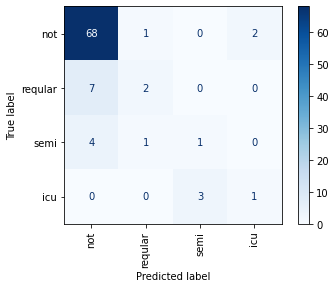

In [ ]:

class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_bst_ove,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')


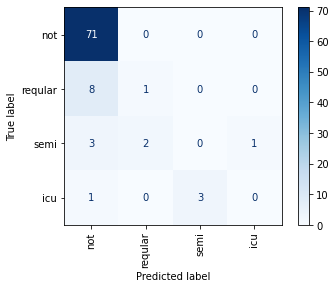

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_bst_bal,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

**random forest confusion matrix**

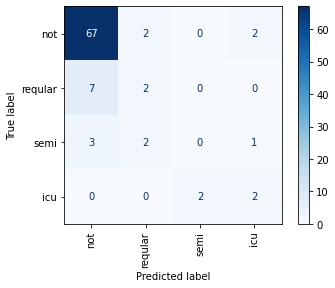

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_rfc_ove,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

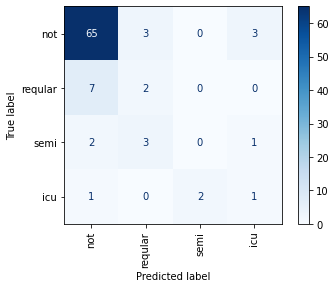

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_rfc_bal,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

logistic regression confusion matrix
**bold text**

Exception ignored in: <function Booster.__del__ at 0x7f9e5e14d7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


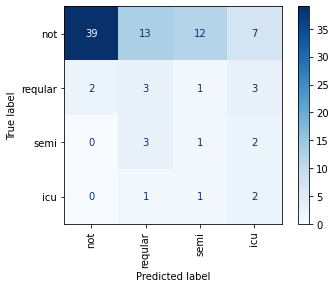

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_lre_ove,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

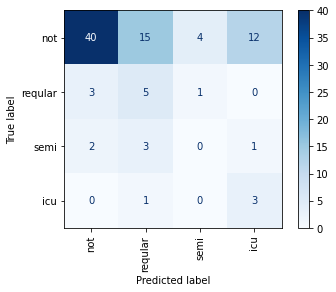

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_lre_bal,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

**xgb confusion matrix**

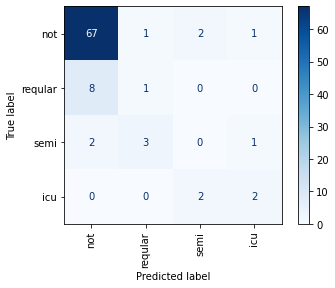

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_xgb_ove,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

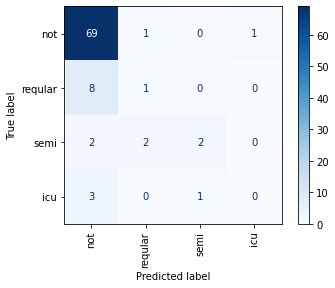

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_xgb_bal,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

**svm confusion matrix**

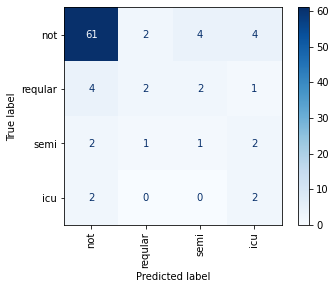

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_svm_ove,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

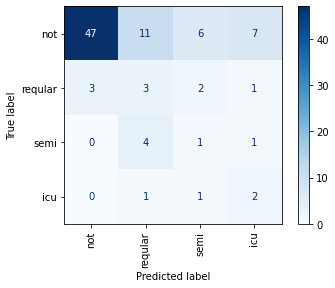

In [ ]:
class_names = ['not', 'reqular', 'semi', 'icu']
disp = plot_confusion_matrix(mdl_svm_bal,x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

In [ ]:
y_pred= mdl_lre_ove.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[39 13 12  7]
 [ 2  3  1  3]
 [ 0  3  1  2]
 [ 0  1  1  2]]
              precision    recall  f1-score   support

           0     0.9512    0.5493    0.6964        71
           1     0.1500    0.3333    0.2069         9
           2     0.0667    0.1667    0.0952         6
           3     0.1429    0.5000    0.2222         4

    accuracy                         0.5000        90
   macro avg     0.3277    0.3873    0.3052        90
weighted avg     0.7762    0.5000    0.5863        90



In [ ]:
y_pred= mdl_lre_bal.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[40 15  4 12]
 [ 3  5  1  0]
 [ 2  3  0  1]
 [ 0  1  0  3]]
              precision    recall  f1-score   support

           0     0.8889    0.5634    0.6897        71
           1     0.2083    0.5556    0.3030         9
           2     0.0000    0.0000    0.0000         6
           3     0.1875    0.7500    0.3000         4

    accuracy                         0.5333        90
   macro avg     0.3212    0.4672    0.3232        90
weighted avg     0.7304    0.5333    0.5877        90



In [ ]:
y_pred= mdl_svm_ove.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[61  2  4  4]
 [ 4  2  2  1]
 [ 2  1  1  2]
 [ 2  0  0  2]]
              precision    recall  f1-score   support

           0     0.8841    0.8592    0.8714        71
           1     0.4000    0.2222    0.2857         9
           2     0.1429    0.1667    0.1538         6
           3     0.2222    0.5000    0.3077         4

    accuracy                         0.7333        90
   macro avg     0.4123    0.4370    0.4047        90
weighted avg     0.7568    0.7333    0.7400        90



In [ ]:
y_pred= mdl_svm_bal.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[47 11  6  7]
 [ 3  3  2  1]
 [ 0  4  1  1]
 [ 0  1  1  2]]
              precision    recall  f1-score   support

           0     0.9400    0.6620    0.7769        71
           1     0.1579    0.3333    0.2143         9
           2     0.1000    0.1667    0.1250         6
           3     0.1818    0.5000    0.2667         4

    accuracy                         0.5889        90
   macro avg     0.3449    0.4155    0.3457        90
weighted avg     0.7721    0.5889    0.6545        90



In [ ]:
y_pred= mdl_xgb_ove.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[67  1  2  1]
 [ 8  1  0  0]
 [ 2  3  0  1]
 [ 0  0  2  2]]
              precision    recall  f1-score   support

           0     0.8701    0.9437    0.9054        71
           1     0.2000    0.1111    0.1429         9
           2     0.0000    0.0000    0.0000         6
           3     0.5000    0.5000    0.5000         4

    accuracy                         0.7778        90
   macro avg     0.3925    0.3887    0.3871        90
weighted avg     0.7287    0.7778    0.7508        90



In [ ]:
y_pred= mdl_xgb_bal.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[69  1  0  1]
 [ 8  1  0  0]
 [ 2  2  2  0]
 [ 3  0  1  0]]
              precision    recall  f1-score   support

           0     0.8415    0.9718    0.9020        71
           1     0.2500    0.1111    0.1538         9
           2     0.6667    0.3333    0.4444         6
           3     0.0000    0.0000    0.0000         4

    accuracy                         0.8000        90
   macro avg     0.4395    0.3541    0.3751        90
weighted avg     0.7333    0.8000    0.7566        90



In [ ]:
y_pred= mdl_bst_ove.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[68  1  0  2]
 [ 7  2  0  0]
 [ 4  1  1  0]
 [ 0  0  3  1]]
              precision    recall  f1-score   support

           0     0.8608    0.9577    0.9067        71
           1     0.5000    0.2222    0.3077         9
           2     0.2500    0.1667    0.2000         6
           3     0.3333    0.2500    0.2857         4

    accuracy                         0.8000        90
   macro avg     0.4860    0.3992    0.4250        90
weighted avg     0.7605    0.8000    0.7721        90



In [ ]:
y_pred= mdl_bst_bal.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=4))

[[71  0  0  0]
 [ 8  1  0  0]
 [ 3  2  0  1]
 [ 1  0  3  0]]
              precision    recall  f1-score   support

           0     0.8554    1.0000    0.9221        71
           1     0.3333    0.1111    0.1667         9
           2     0.0000    0.0000    0.0000         6
           3     0.0000    0.0000    0.0000         4

    accuracy                         0.8000        90
   macro avg     0.2972    0.2778    0.2722        90
weighted avg     0.7082    0.8000    0.7441        90



In [ ]:
def bootstrap_resampling(x_test, y_test, rs_number, sample_size):
    # Generate X sample
    bootstrap_x = resample(x_test, replace=True, n_samples=sample_size, random_state=rs_number)
    # Get index for X to get Y value
    bootstrap_y = y_test.loc[bootstrap_x.index]
    # Return
    return bootstrap_x, bootstrap_y

In [ ]:
def bootstrap_confidence_interval(values):
    percents = np.percentile(values, [2.5, 97.5])
    lower_bound = round(max(0.0, percents[0]), 3)
    upper_bound = round(min(1.0, percents[1]), 3)
    mean_value = round(np.mean(values), 3)
    return (lower_bound, mean_value, upper_bound)